In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [25]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
def analyze_sentiment(text):
    blob = TextBlob(str(text))
    score = blob.sentiment.polarity
    
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
df['Sentiment'] = df['verified_reviews'].apply(analyze_sentiment)
df.sample(5)

,rating,date,variation,verified_reviews,feedback,Sentiment
1837,4,28-Jul-18,Black Plus,Music mainly but still checking other features,1,Positive
2143,5,30-Jul-18,Configuration: Fire TV Stick,Exceeded my expectations,1,Neutral
2315,5,30-Jul-18,Configuration: Fire TV Stick,"Love my fire stick and remote, so easy to set ...",1,Positive
1764,2,30-Jul-18,Black Plus,,0,Neutral
2470,5,30-Jul-18,Black Dot,I have had the echo dot for about two weeks an...,1,Positive


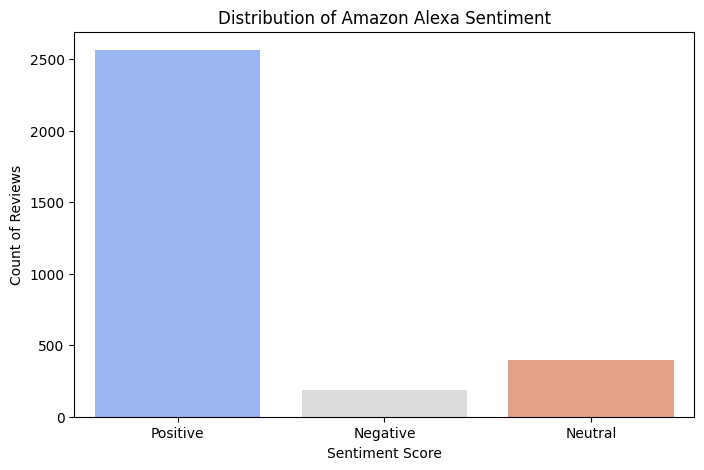

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', hue = 'Sentiment', data = df, palette = 'coolwarm', legend = False)
plt.title('Distribution of Amazon Alexa Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Count of Reviews')

plt.savefig('sentiment_graph.png')
plt.show()